# K-Nearest Neighbors on classified dataset 

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Read/Load the Dataset

dataset=pd.read_csv("Classified Data", index_col=0)

In [5]:
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [16]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(dataset.drop('TARGET CLASS', axis=1))

scaled_features=scaler.transform(dataset.drop('TARGET CLASS', axis=1))

In [24]:
scaled_data=pd.DataFrame(scaled_features, columns=dataset.columns[:-1])

In [25]:
scaled_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [27]:
X=scaled_data
y=dataset['TARGET CLASS']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[128  12]
 [  9 151]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       140
           1       0.93      0.94      0.93       160

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [31]:
# Elbow Method

error_rate=[]

for k in range (1, 50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    
    error=np.mean(y_test!=y_pred)
    
    error_rate.append(error)
    
    

Text(0, 0.5, 'Error')

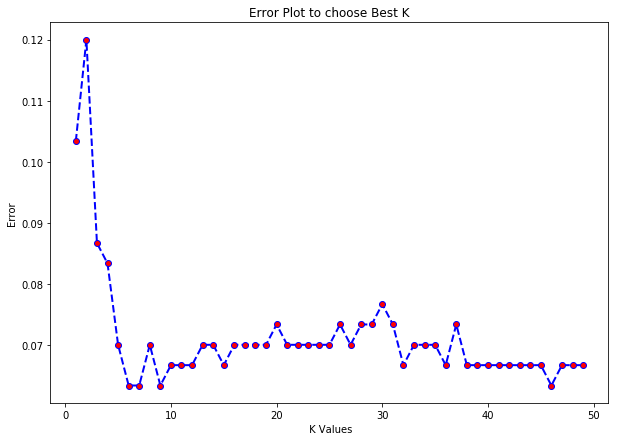

In [41]:
# Plot to choose best k

plt.figure(figsize=(10,7))
plt.plot(range(1,50), error_rate, color='blue', marker='o', markerfacecolor='red', linestyle='dashed',linewidth=2, markersize=6)

plt.title('Error Plot to choose Best K')
plt.xlabel(' K Values')
plt.ylabel('Error')

In [44]:
# choosing k=15

knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [45]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[127  13]
 [  7 153]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       140
           1       0.92      0.96      0.94       160

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [46]:
# choosing k=9

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[130  10]
 [  9 151]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       140
           1       0.94      0.94      0.94       160

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [47]:
# choosing k=45

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[130  10]
 [  9 151]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       140
           1       0.94      0.94      0.94       160

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

